In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw
plt.rc('hatch', color='k', linewidth=1.5)

In [3]:
def angle_generator(angle):
    R = np.zeros(shape=(2,2))
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R[0,0] = c
    R[0,1] = -s
    R[1,0] = s
    R[1,1] = c
    return R

In [4]:
def array_rotator(array, angle):
    rotated_array = np.empty(array.shape)
    R = angle_generator(angle)
    for i in range(len(array)):
        rotated_array[i, :] =  np.dot(R, array[i,:])  
    
    return rotated_array 

In [5]:
z_test_tsne_track_31_sam = np.load("../compressed_data/Big_SAM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_sam_origin = np.load('../compressed_data/Big_SPCAM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_IFS = np.load('../compressed_data/Big_IFS_Interp_For_UM_2D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_NICAM = np.load('../compressed_data/Big_NICAM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy', mmap_mode="r")
z_test_tsne_track_31_SHIELD = np.load('../compressed_data/Big_SHIELD_Interp_For_UM_2D_PCA_Latent_Space__4503.npy')
z_test_tsne_track_31_ICON = np.load("../compressed_data/Big_ICON_Interp_For_UM_2D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_ARPEGE = np.load("../compressed_data/Big_ARPEGE_Interp_For_UM_2D_PCA_Latent_Space__4503.npy", mmap_mode="r")
z_test_tsne_track_31_GEM = np.load('../compressed_data/Big_GEM_Interp_For_UM_2D_PCA_Latent_Space__4503.npy')
z_test_tsne_track_31_UM = np.load('../compressed_data/Big_UM_2D_PCA_Latent_Space__4503.npy')

In [6]:
max_corr = 117
z_test_tsne_track_31_sam  = array_rotator(z_test_tsne_track_31_sam , max_corr)
z_test_tsne_track_31_sam_origin  = array_rotator(z_test_tsne_track_31_sam_origin , max_corr)
z_test_tsne_track_31_IFS  = array_rotator(z_test_tsne_track_31_IFS , max_corr)
z_test_tsne_track_31_NICAM  = array_rotator(z_test_tsne_track_31_NICAM , max_corr)
z_test_tsne_track_31_SHIELD  = array_rotator(z_test_tsne_track_31_SHIELD , max_corr)
z_test_tsne_track_31_ICON  = array_rotator(z_test_tsne_track_31_ICON , max_corr)
z_test_tsne_track_31_ARPEGE  = array_rotator(z_test_tsne_track_31_ARPEGE , max_corr)
z_test_tsne_track_31_GEM  = array_rotator(z_test_tsne_track_31_GEM , max_corr)
z_test_tsne_track_31_UM  = array_rotator(z_test_tsne_track_31_UM , max_corr)

# Land Fraction

In [7]:
spcam_land_frac = np.load("../compressed_data/S6_SPCAM_LAND_FRAC.npy")
sam_land_frac = np.load("../compressed_data/S6_SAM_LAND_FRAC.npy")
ifs_land_frac = np.load("../compressed_data/S6_IFS_LAND_FRAC.npy")
nicam_land_frac = np.load("../compressed_data/S6_NICAM_LAND_FRAC.npy")
um_land_frac = np.load("../compressed_data/S6_UM_LAND_FRAC.npy")
icon_land_frac = np.load("../compressed_data/S6_ICON_LAND_FRAC.npy")
arpege_land_frac = np.load("../compressed_data/S6_ARPEGE_LAND_FRAC.npy")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


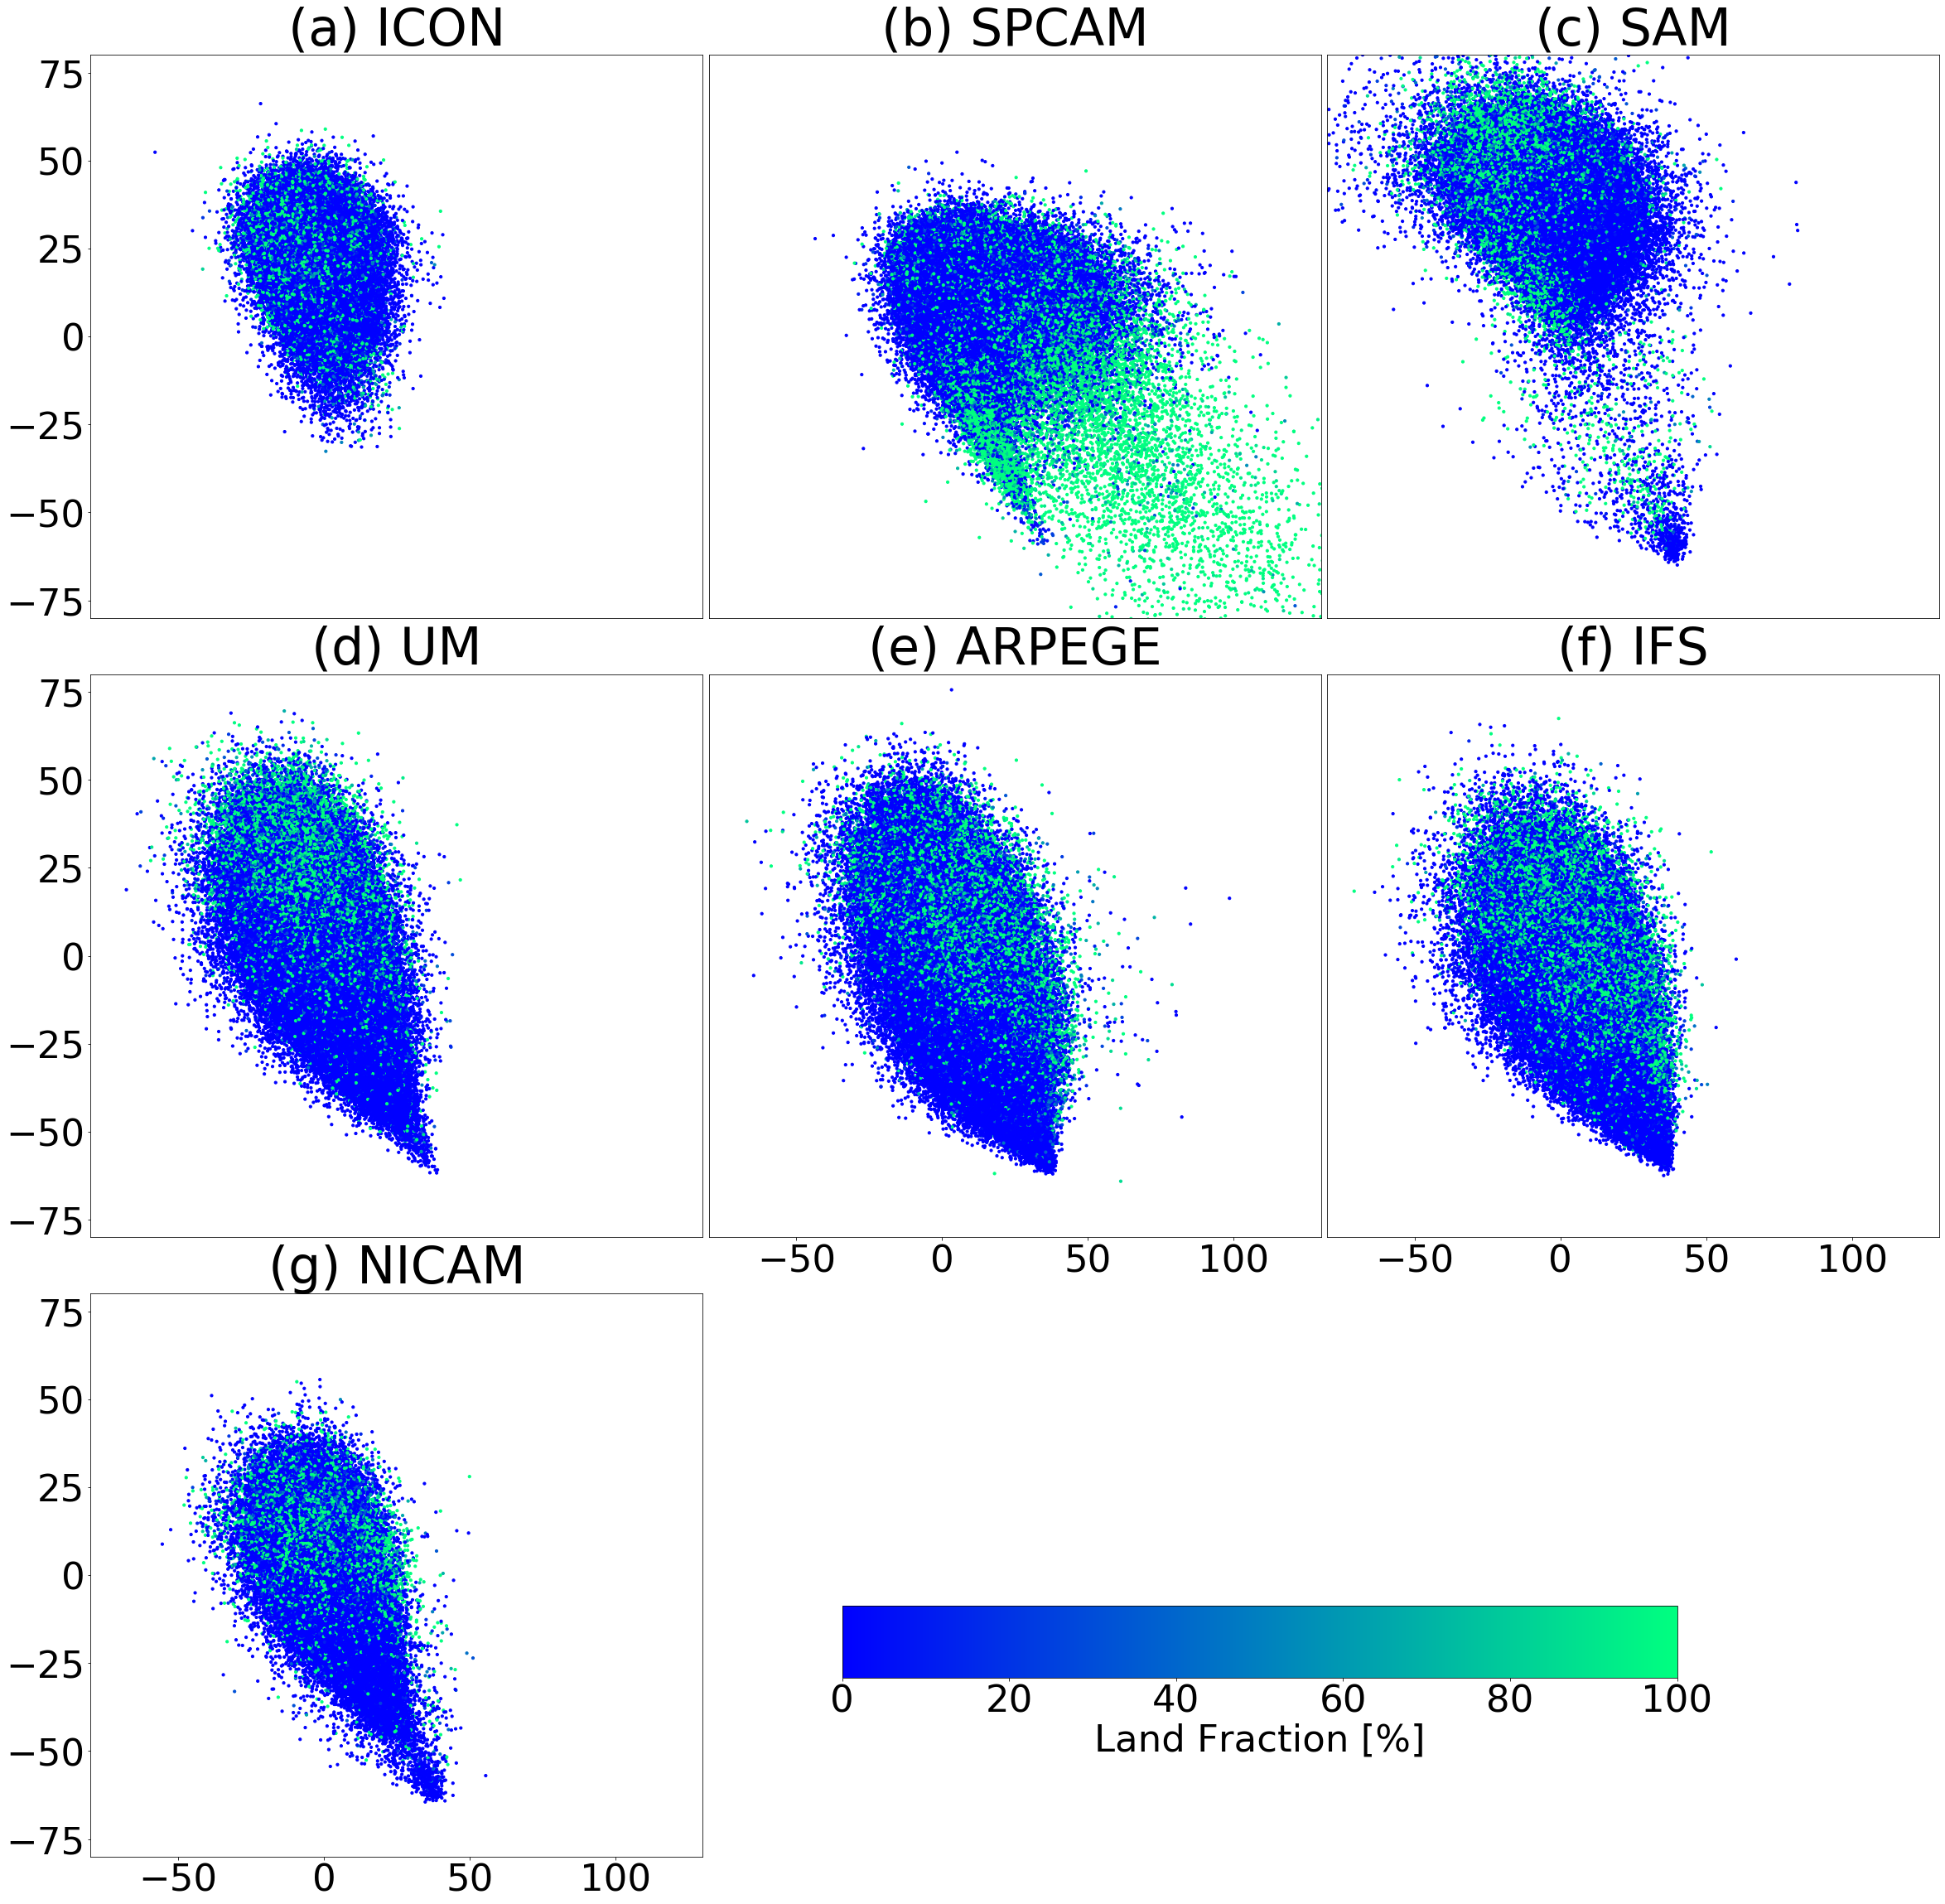

In [8]:
fig, ax = plt.subplots(3,3,figsize=(40,40))
gs=GridSpec(3,3)

vmin=0
vmax=1
factor = 2.0

xmil = -80
xmal = 130

ymil = -80
ymal = 80

title_y = 1.0

ax1 = fig.add_subplot(gs[0,0])

cp = ax1.scatter(x=z_test_tsne_track_31_ICON[:, 0], y=z_test_tsne_track_31_ICON[:, 1],  c=icon_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100)
ax1.set_title("(a) ICON", fontsize = fz*2.75, y = title_y)

ax1.set_xlim(xmil, xmal)
ax1.set_ylim(ymil, ymal)
ax1.set_xticks([])
ax1.tick_params(axis='y', which='major', labelsize=fz*factor)


ax2 = fig.add_subplot(gs[0,1])

cp = ax2.scatter(x=z_test_tsne_track_31_sam_origin[:, 0], y=z_test_tsne_track_31_sam_origin[:, 1], c=spcam_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100)
ax2.set_title("(b) SPCAM", fontsize = fz*2.75, y = title_y)

ax2.set_xlim(xmil, xmal)
ax2.set_ylim(ymil, ymal)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(gs[0,2])

cp = ax3.scatter(x=z_test_tsne_track_31_sam[:, 0], y=z_test_tsne_track_31_sam[:, 1], c=sam_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100)
ax3.set_title("(c) SAM", fontsize = fz*2.75, y = title_y)

ax3.set_xlim(xmil, xmal)
ax3.set_ylim(ymil, ymal)
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(gs[1,0])

cp = ax4.scatter(x=z_test_tsne_track_31_UM[:, 0], y=z_test_tsne_track_31_UM[:, 1], c=um_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100)
ax4.set_title("(d) UM", fontsize = fz*2.75, y = title_y)

ax4.set_xlim(xmil, xmal)
ax4.set_ylim(ymil, ymal)
ax4.set_xticks([])
ax4.tick_params(axis='y', which='major', labelsize=fz*factor)

ax5 = fig.add_subplot(gs[1,1])

cp = ax5.scatter(x=z_test_tsne_track_31_ARPEGE[:, 0], y=z_test_tsne_track_31_ARPEGE[:, 1], c=arpege_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100)
ax5.set_title("(e) ARPEGE", fontsize = fz*2.75, y = title_y)

ax5.set_xlim(xmil, xmal)
ax5.set_ylim(ymil, ymal)
ax5.set_yticks([])
ax5.tick_params(axis='x', which='major', labelsize=fz*factor)

ax6 = fig.add_subplot(gs[1,2])

cp = ax6.scatter(x=z_test_tsne_track_31_IFS[:, 0], y=z_test_tsne_track_31_IFS[:, 1], c=ifs_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100)
ax6.set_title("(f) IFS", fontsize = fz*2.75, y = title_y)

ax6.set_xlim(xmil, xmal)
ax6.set_ylim(ymil, ymal)
ax6.set_yticks([])
ax6.tick_params(axis='x', which='major', labelsize=fz*factor)

ax7 = fig.add_subplot(gs[2,0])

cp = ax7.scatter(x=z_test_tsne_track_31_NICAM[:, 0], y=z_test_tsne_track_31_NICAM[:, 1], c=nicam_land_frac*100, cmap="winter", s=10.0, vmin=vmin*100, vmax=vmax*100)
ax7.set_title("(g) NICAM", fontsize = fz*2.75, y = title_y)

ax7.set_xlim(xmil, xmal)
ax7.set_ylim(ymil, ymal)
ax7.tick_params(axis='x', which='major', labelsize=fz*factor)
ax7.tick_params(axis='y', which='major', labelsize=fz*factor)

cbar_ax = fig.add_axes([0.44, 0.2, 0.35, 0.03])
cbar = fig.colorbar(cp, orientation='horizontal', cax=cbar_ax)
cbar.set_label('Land Fraction [%]', fontsize=fz*factor)
cbar.ax.tick_params(labelsize=fz*factor)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

plt.subplots_adjust(wspace=0.01, hspace=0.1)

plt.savefig("../Figures/Figure_S5.png", bbox_inches='tight', pad_inches = 0.1)

# Convective Organization

In [9]:
EQ_1_ww_test_SAM_Origin_profile = np.load("../compressed_data/4802_EQ_1_ww_test_SAM_Origin_profile.npy")
EQ_1_ww_test_SAM_profile = np.load("../compressed_data/4802_EQ_1_ww_test_SAM_profile.npy")
EQ_1_ww_test_NICAM_profile = np.load("../compressed_data/4802_EQ_1_ww_test_NICAM_profile.npy")
EQ_1_ww_test_IFS_profile = np.load("../compressed_data/4802_EQ_1_ww_test_IFS_profile.npy")
EQ_1_ww_test_UM_profile = np.load("../compressed_data/4802_EQ_1_ww_test_UM_profile.npy")
EQ_1_ww_test_SHIELD_profile = np.load("../compressed_data/4802_EQ_1_ww_test_SHIELD_profile.npy")
EQ_1_ww_test_ICON_profile = np.load("../compressed_data/4802_EQ_1_ww_test_ICON_profile.npy")
EQ_1_ww_test_ARPEGE_profile = np.load("../compressed_data/4802_EQ_1_ww_test_ARPEGE_profile.npy")
EQ_1_ww_test_GEM_profile = np.load("../compressed_data/4802_EQ_1_ww_test_GEM_profile.npy")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
/export/home/gmooers/miniconda3/envs/CPU_GEO/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSy

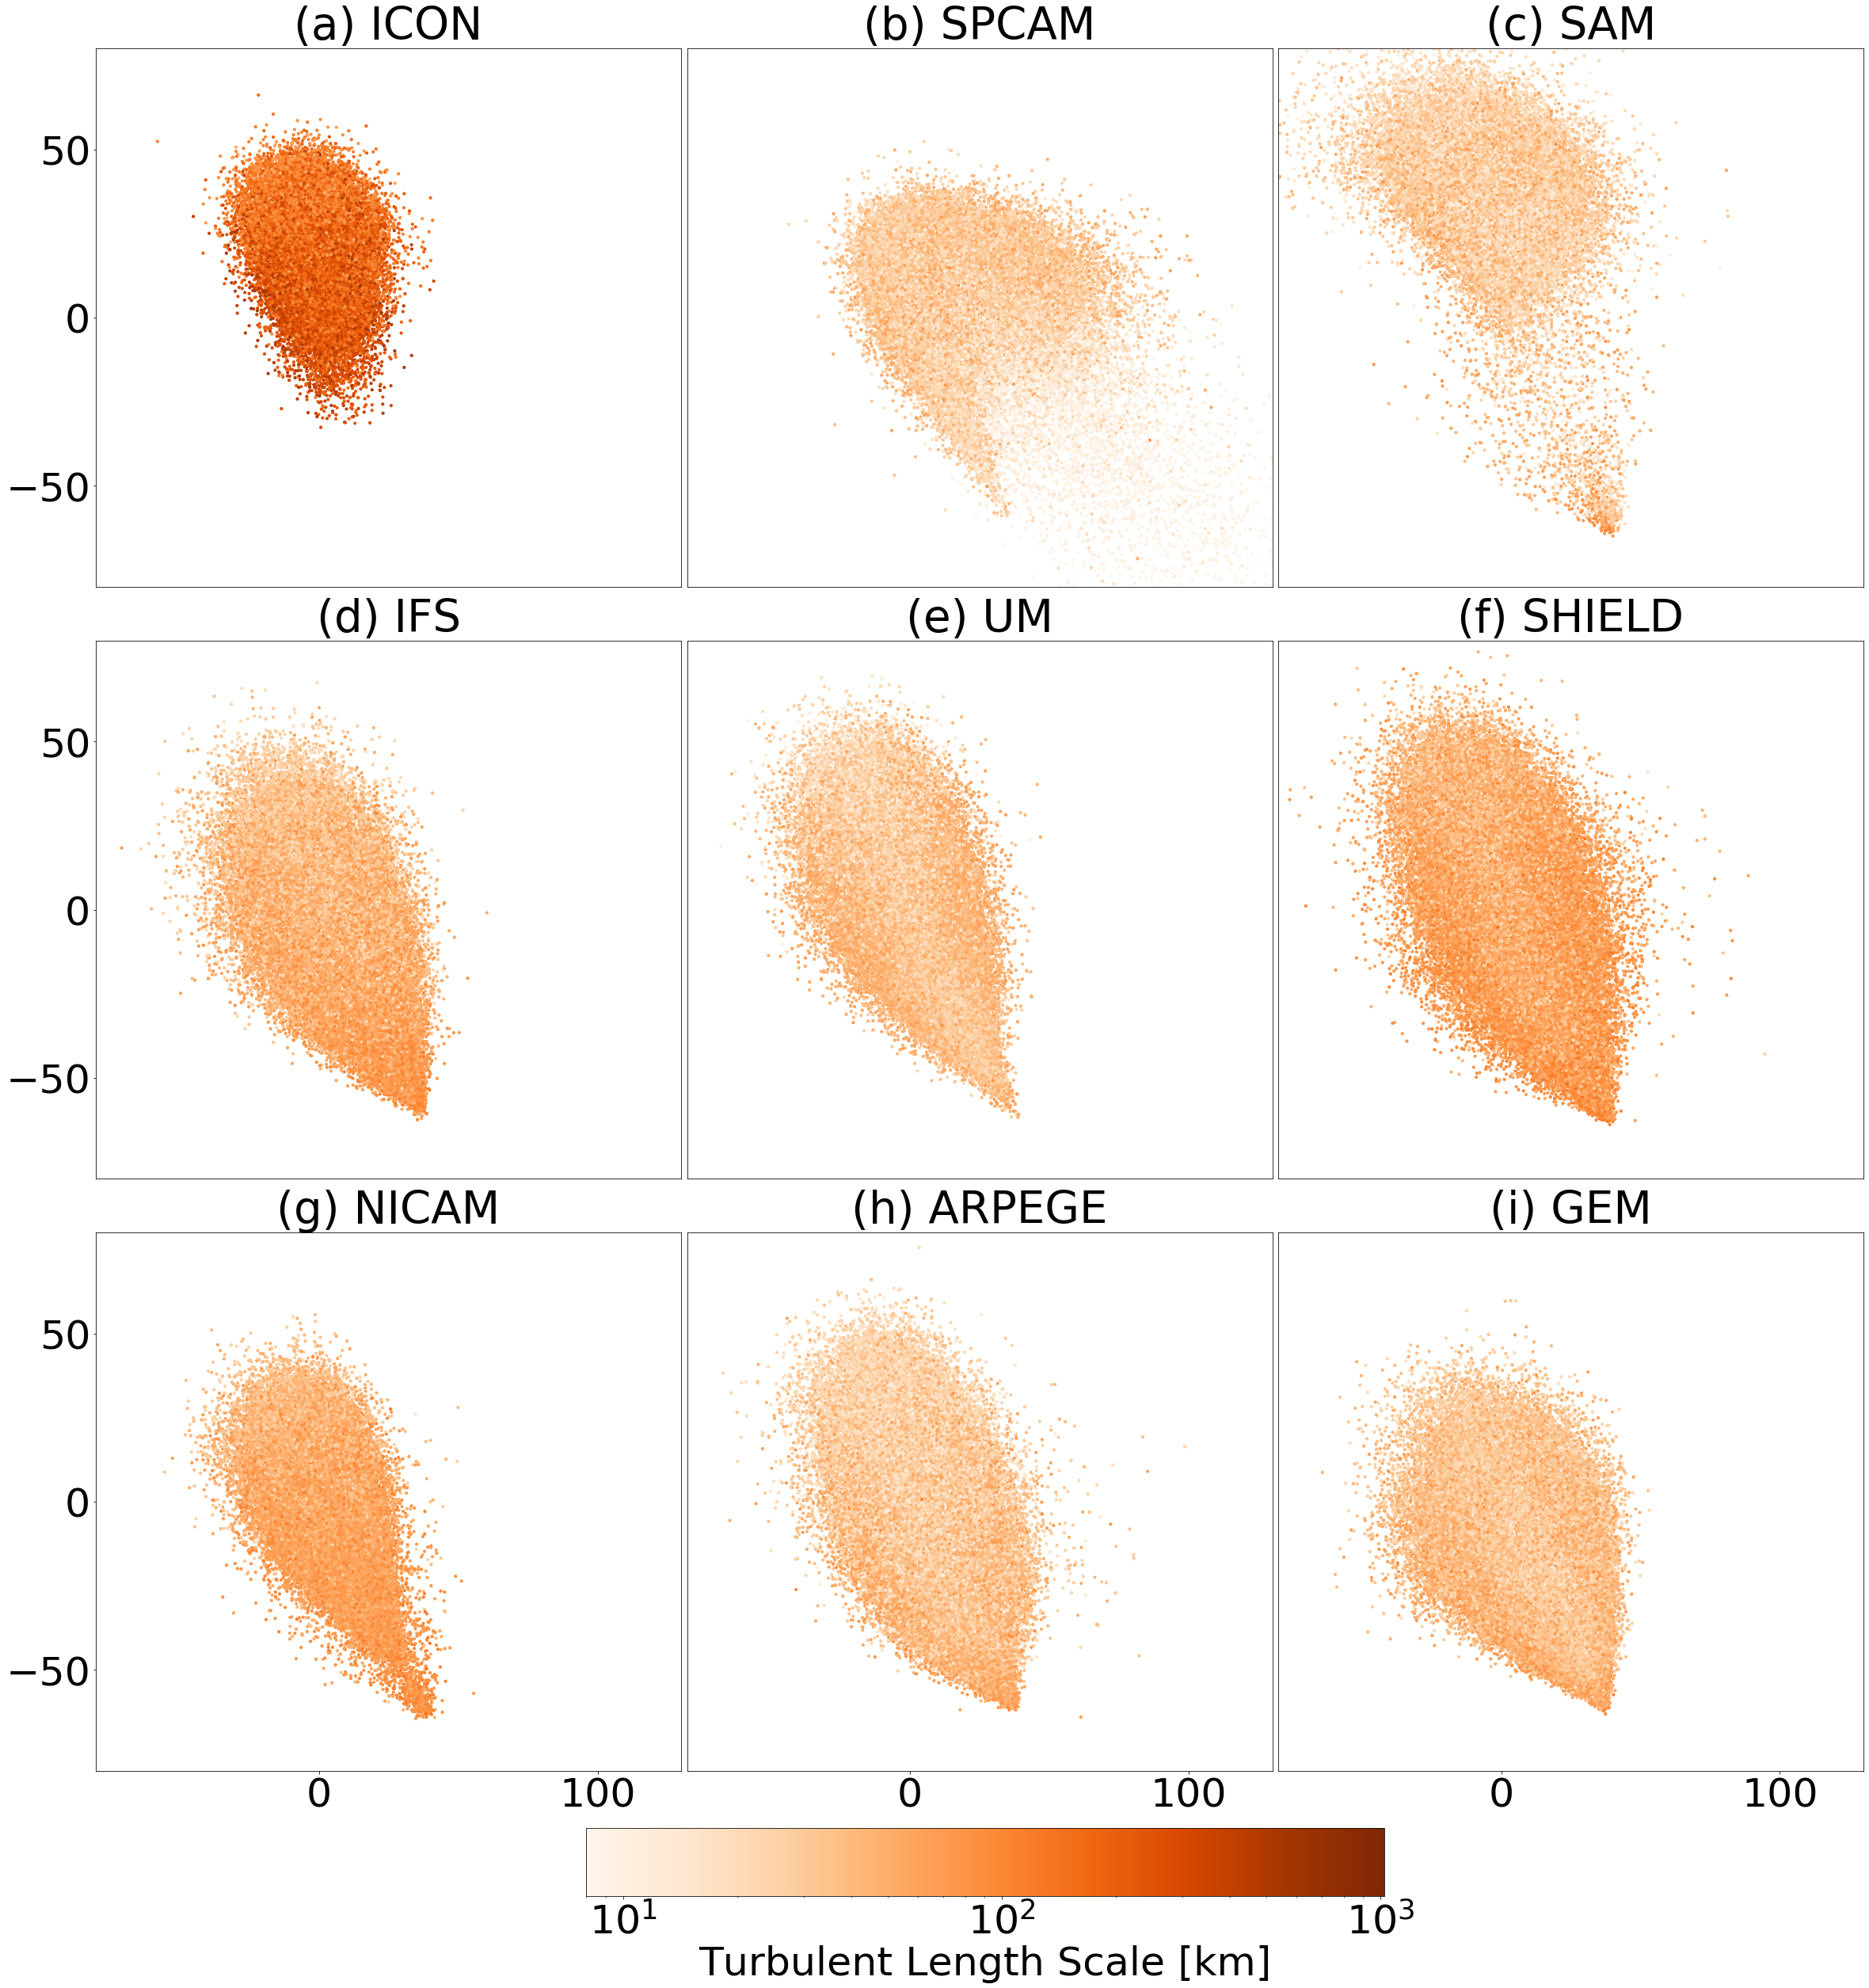

In [10]:
fig, ax = plt.subplots(3,3,figsize=(40,40))
gs=GridSpec(3,3)

vmin = 2*4
vmax = 256*4
factor = 2.25

ax1 = fig.add_subplot(gs[0,0])

xminlim = -80
xmaxlim = 130

yminlim = -80
ymaxlim = 80

title_y = 1.0
cmap = "Oranges"

cp = ax1.scatter(x=z_test_tsne_track_31_ICON[:, 0], y=z_test_tsne_track_31_ICON[:, 1], c=EQ_1_ww_test_ICON_profile*4, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax1.set_title("(a) ICON", fontsize = fz*(factor+0.25), y = title_y)

ax1.set_xlim(xminlim,xmaxlim)
ax1.set_ylim(yminlim,ymaxlim)

ax1.set_xticks([])
ax1.tick_params(axis='y', which='major', labelsize=fz*factor)

ax2 = fig.add_subplot(gs[0,1])

cp = ax2.scatter(x=z_test_tsne_track_31_sam_origin[:, 0], y=z_test_tsne_track_31_sam_origin[:, 1], c=EQ_1_ww_test_SAM_Origin_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax2.set_title("(b) SPCAM", fontsize = fz*(factor+0.25), y = title_y)

ax2.set_xlim(xminlim,xmaxlim)
ax2.set_ylim(yminlim,ymaxlim)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(gs[0,2])

cp = ax3.scatter(x=z_test_tsne_track_31_sam[:, 0], y=z_test_tsne_track_31_sam[:, 1],  c=EQ_1_ww_test_SAM_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax3.set_title("(c) SAM", fontsize = fz*(factor+0.25), y = title_y)

ax3.set_xlim(xminlim,xmaxlim)
ax3.set_ylim(yminlim,ymaxlim)
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(gs[1,0])

cp = ax4.scatter(x=z_test_tsne_track_31_IFS[:, 0], y=z_test_tsne_track_31_IFS[:, 1], c=EQ_1_ww_test_IFS_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax4.set_title("(d) IFS", fontsize = fz*(factor+0.25), y = title_y)

ax4.set_xlim(xminlim,xmaxlim)
ax4.set_ylim(yminlim,ymaxlim)
ax4.set_xticks([])
ax4.tick_params(axis='y', which='major', labelsize=fz*factor)

ax5 = fig.add_subplot(gs[1,1])

cp = ax5.scatter(x=z_test_tsne_track_31_UM[:, 0], y=z_test_tsne_track_31_UM[:, 1], c=EQ_1_ww_test_UM_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax5.set_title("(e) UM", fontsize = fz*(factor+0.25), y = title_y)

ax5.set_xlim(xminlim,xmaxlim)
ax5.set_ylim(yminlim,ymaxlim)
ax5.set_xticks([])
ax5.set_yticks([])

ax6 = fig.add_subplot(gs[1,2])

cp = ax6.scatter(x=z_test_tsne_track_31_SHIELD[:, 0], y=z_test_tsne_track_31_SHIELD[:, 1], c=EQ_1_ww_test_SHIELD_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax6.set_title("(f) SHIELD", fontsize = fz*(factor+0.25), y = title_y)

ax6.set_xlim(xminlim,xmaxlim)
ax6.set_ylim(yminlim,ymaxlim)
ax6.set_xticks([])
ax6.set_yticks([])

ax7 = fig.add_subplot(gs[2,0])

cp = ax7.scatter(x=z_test_tsne_track_31_NICAM[:, 0], y=z_test_tsne_track_31_NICAM[:, 1], c=EQ_1_ww_test_NICAM_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax7.set_title("(g) NICAM", fontsize = fz*(factor+0.25), y = title_y)

ax7.set_xlim(xminlim,xmaxlim)
ax7.set_ylim(yminlim,ymaxlim)
ax7.tick_params(axis='x', which='major', labelsize=fz*factor)
ax7.tick_params(axis='y', which='major', labelsize=fz*factor)

ax8 = fig.add_subplot(gs[2,1])

cp = ax8.scatter(x=z_test_tsne_track_31_ARPEGE[:, 0], y=z_test_tsne_track_31_ARPEGE[:, 1], c=EQ_1_ww_test_ARPEGE_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax8.set_title("(h) ARPEGE", fontsize = fz*(factor+0.25), y = title_y)

ax8.set_xlim(xminlim,xmaxlim)
ax8.set_ylim(yminlim,ymaxlim)
ax8.set_yticks([])
ax8.tick_params(axis='x', which='major', labelsize=fz*factor)


ax9 = fig.add_subplot(gs[2,2])

cp = ax9.scatter(x=z_test_tsne_track_31_GEM[:, 0], y=z_test_tsne_track_31_GEM[:, 1], c=EQ_1_ww_test_GEM_profile, cmap=cmap, s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax9.set_title("(i) GEM", fontsize = fz*(factor+0.25), y = title_y)

ax9.set_xlim(xminlim,xmaxlim)
ax9.set_ylim(yminlim,ymaxlim)
ax9.tick_params(axis='x', which='major', labelsize=fz*factor)

ax9.set_yticks([])

cbar_ax = fig.add_axes([0.34, 0.07, 0.35, 0.03])
cbar = fig.colorbar(cp, orientation='horizontal', cax=cbar_ax)
cbar.set_label('Turbulent Length Scale [km]', fontsize=fz*factor)
cbar.ax.tick_params(labelsize=fz*(factor))

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

plt.subplots_adjust(wspace=0.01, hspace=0.1)
plt.savefig("../Figures/Figure_S6.png", bbox_inches='tight', pad_inches = 0.1)

# Intensity

In [11]:
tke_GEM = np.load("../compressed_data//4802_tke_GEM.npy")
tke_SAM_Origin = np.load("../compressed_data//4802_tke_SAM_Origin.npy")
tke_SAM = np.load("../compressed_data//4802_tke_SAM.npy")
tke_NICAM = np.load("../compressed_data//4802_tke_NICAM.npy")
tke_IFS = np.load("../compressed_data//4802_tke_IFS.npy")
tke_UM = np.load("../compressed_data//4802_tke_UM.npy")
tke_SHIELD = np.load("../compressed_data//4802_tke_SHIELD.npy")
tke_ICON = np.load("../compressed_data//4802_tke_ICON.npy")
tke_ARPEGE = np.load("../compressed_data//4802_tke_ARPEGE.npy")

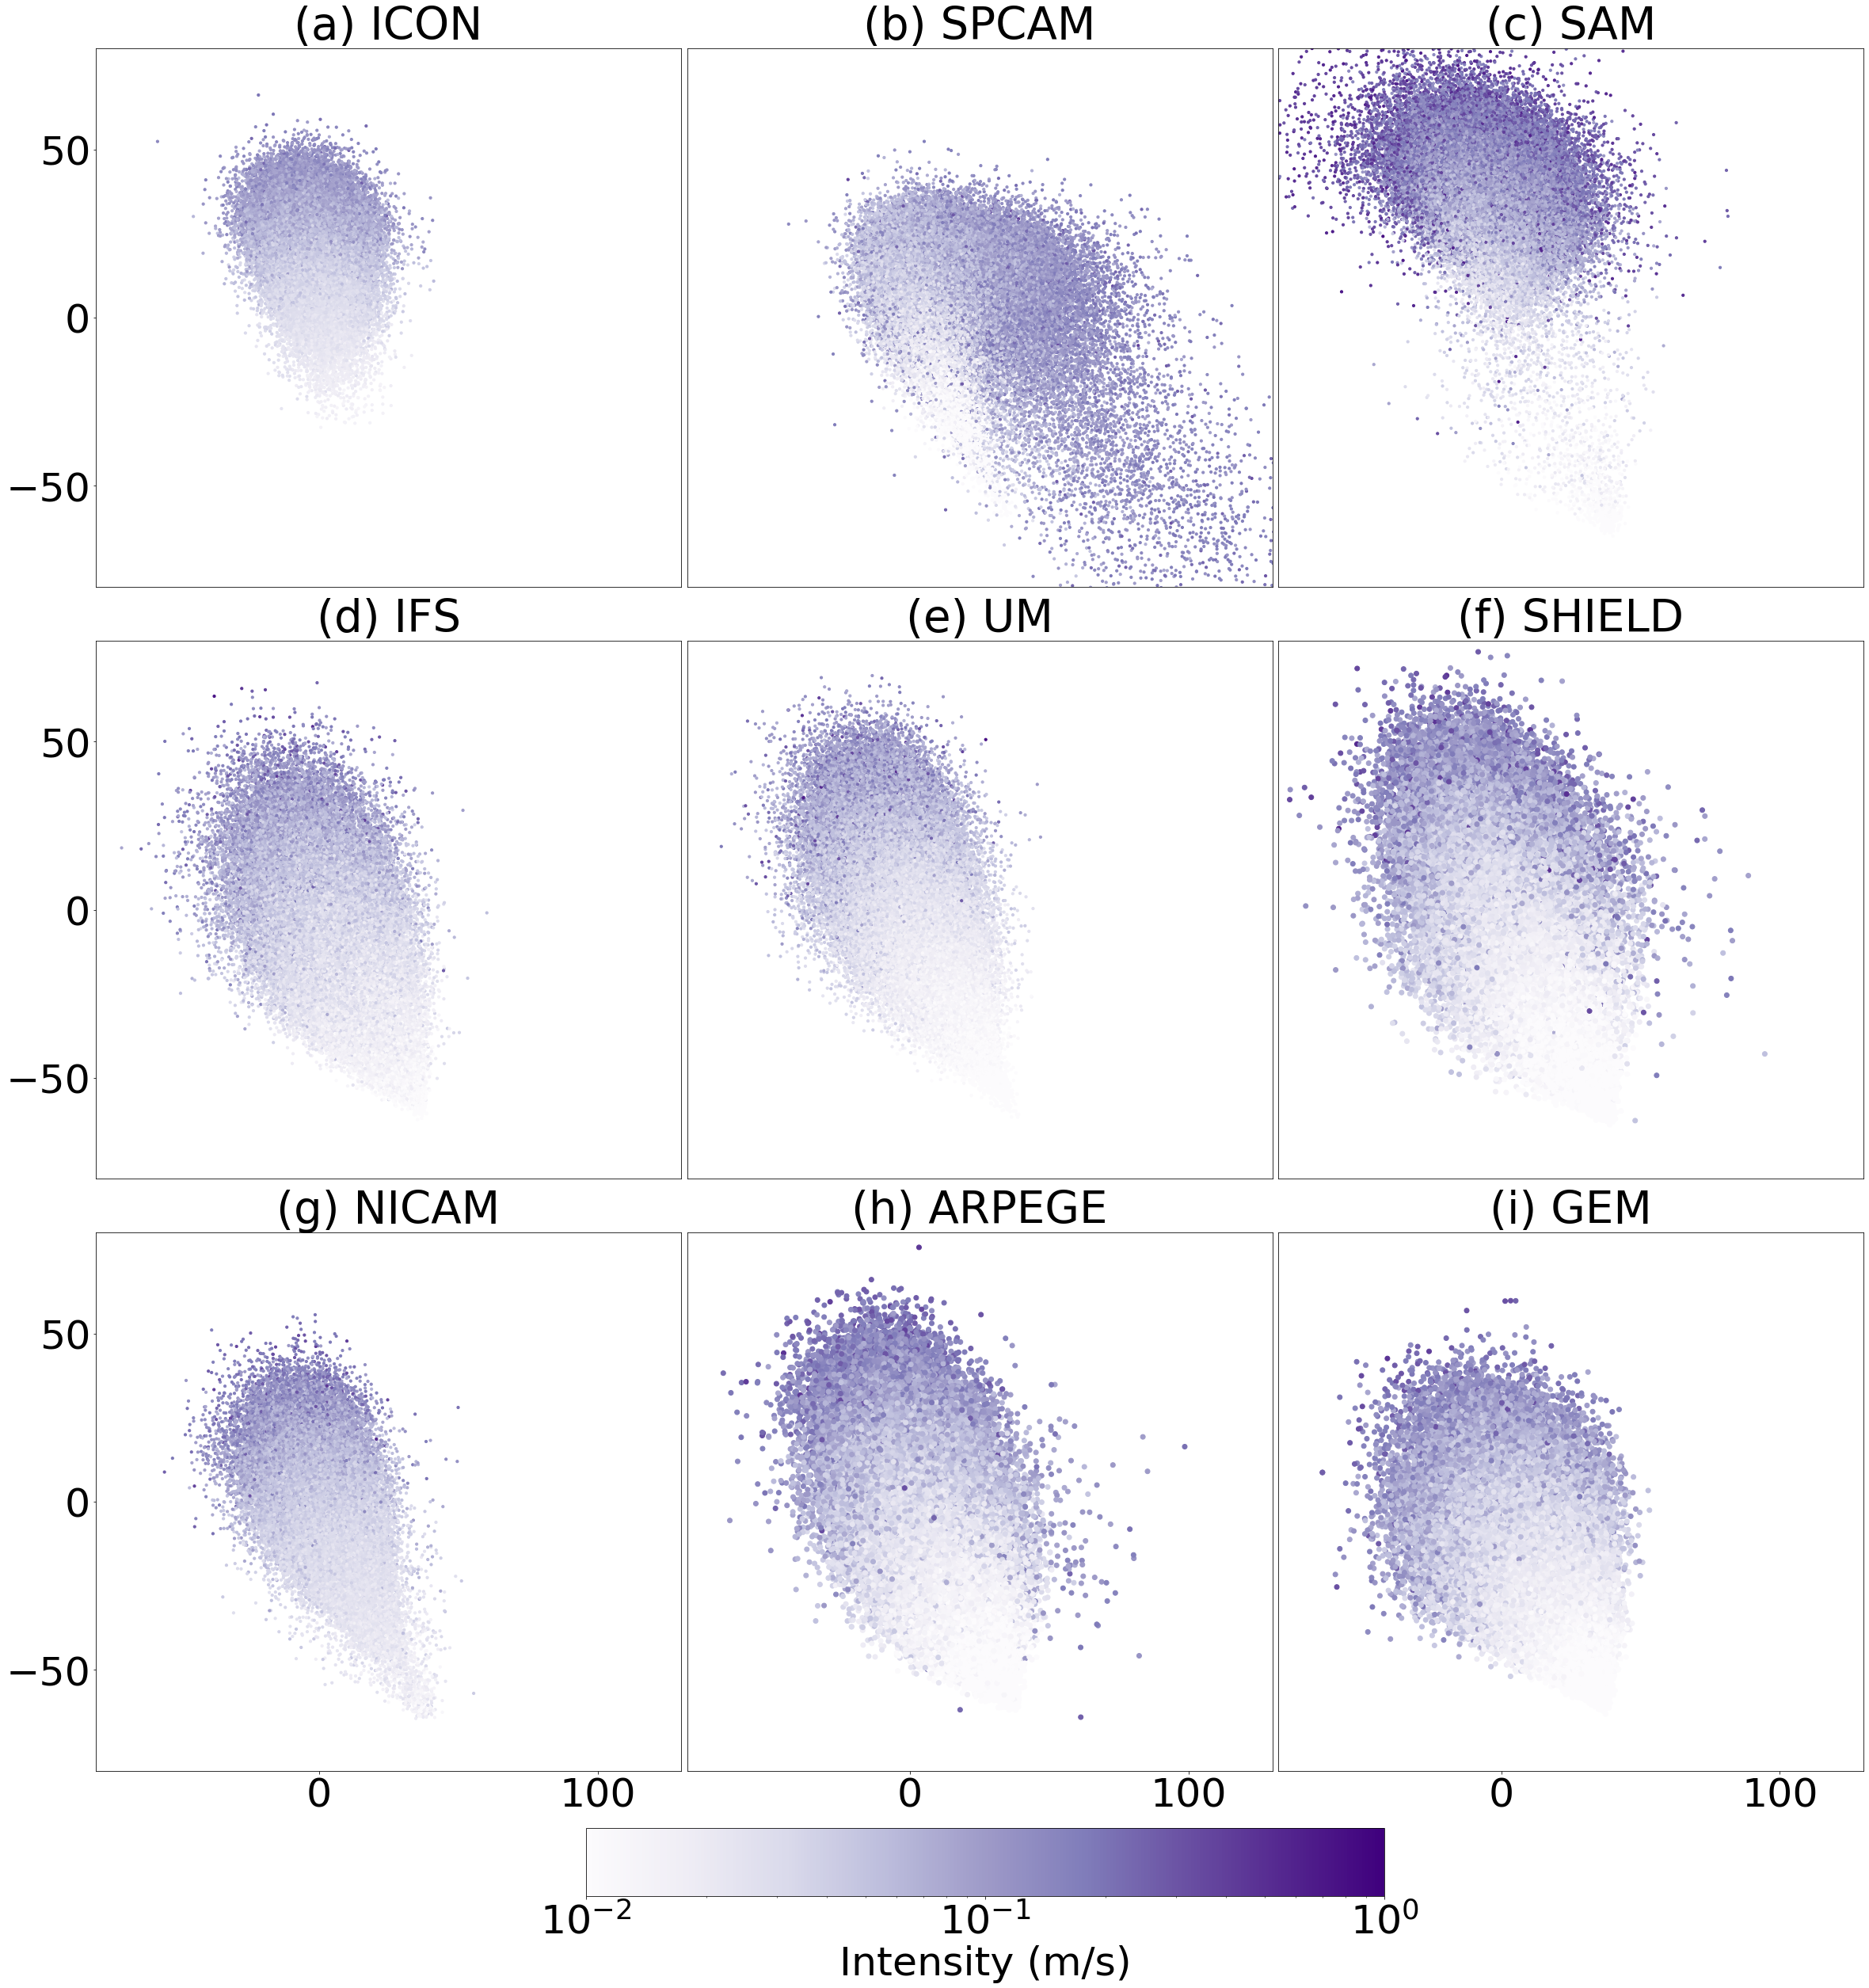

In [12]:
fig, ax = plt.subplots(3,3,figsize=(40,40))
gs=GridSpec(3,3)

vmin = 0.01
vmax = 1


xmil = -80
xmal = 130

ymil = -80
ymal = 80

factor = 2.25
y_title = 1.0

ax1 = fig.add_subplot(gs[0,0])

cp = ax1.scatter(x=z_test_tsne_track_31_ICON[:, 0], y=z_test_tsne_track_31_ICON[:, 1], c=tke_ICON, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax1.set_title("(a) ICON", fontsize = fz*(factor+0.25), y = y_title)

ax1.set_xlim(xmil, xmal)
ax1.set_ylim(ymil, ymal)
ax1.set_xticks([])
ax1.tick_params(axis='y', which='major', labelsize=fz*factor)


ax2 = fig.add_subplot(gs[0,1])

cp = ax2.scatter(x=z_test_tsne_track_31_sam_origin[:, 0], y=z_test_tsne_track_31_sam_origin[:, 1], c=tke_SAM_Origin, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax2.set_title("(b) SPCAM", fontsize = fz*(factor+0.25), y = y_title)

ax2.set_xlim(xmil, xmal)
ax2.set_ylim(ymil, ymal)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(gs[0,2])

cp = ax3.scatter(x=z_test_tsne_track_31_sam[:, 0], y=z_test_tsne_track_31_sam[:, 1], c=tke_SAM, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax3.set_title("(c) SAM", fontsize = fz*(factor+0.25), y = y_title)

ax3.set_xlim(xmil, xmal)
ax3.set_ylim(ymil, ymal)
ax3.set_xticks([])
ax3.set_yticks([])


ax4 = fig.add_subplot(gs[1,0])

cp = ax4.scatter(x=z_test_tsne_track_31_IFS[:, 0], y=z_test_tsne_track_31_IFS[:, 1], c=tke_IFS, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax4.set_title("(d) IFS", fontsize = fz*(factor+0.25), y = y_title)

ax4.set_xlim(xmil, xmal)
ax4.set_ylim(ymil, ymal)
ax4.set_xticks([])
ax4.tick_params(axis='y', which='major', labelsize=fz*factor)


ax5 = fig.add_subplot(gs[1,1])

cp = ax5.scatter(x=z_test_tsne_track_31_UM[:, 0], y=z_test_tsne_track_31_UM[:, 1],  c=tke_UM, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax5.set_title("(e) UM", fontsize = fz*(factor+0.25), y = y_title)

ax5.set_xlim(xmil, xmal)
ax5.set_ylim(ymil, ymal)
ax5.set_xticks([])
ax5.set_yticks([])

ax6 = fig.add_subplot(gs[1,2])

cp = ax6.scatter(x=z_test_tsne_track_31_SHIELD[:, 0], y=z_test_tsne_track_31_SHIELD[:, 1], c=tke_SHIELD, cmap="Purples", vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax6.set_title("(f) SHIELD", fontsize = fz*(factor+0.25), y = y_title)

ax6.set_xlim(xmil, xmal)
ax6.set_ylim(ymil, ymal)
ax6.set_xticks([])
ax6.set_yticks([])


ax7 = fig.add_subplot(gs[2,0])

cp = ax7.scatter(x=z_test_tsne_track_31_NICAM[:, 0], y=z_test_tsne_track_31_NICAM[:, 1], c=tke_NICAM, cmap="Purples", s=10.0, vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax7.set_title("(g) NICAM", fontsize = fz*(factor+0.25), y = y_title)

ax7.set_xlim(xmil, xmal)
ax7.set_ylim(ymil, ymal)
ax7.tick_params(axis='x', which='major', labelsize=fz*factor)
ax7.tick_params(axis='y', which='major', labelsize=fz*factor)

ax8 = fig.add_subplot(gs[2,1])

cp = ax8.scatter(x=z_test_tsne_track_31_ARPEGE[:, 0], y=z_test_tsne_track_31_ARPEGE[:, 1],  c=tke_ARPEGE, cmap="Purples", vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax8.set_title("(h) ARPEGE", fontsize = fz*(factor+0.25), y = y_title)

ax8.set_xlim(xmil, xmal)
ax8.set_ylim(ymil, ymal)
ax8.set_yticks([])
ax8.tick_params(axis='x', which='major', labelsize=fz*factor)

ax9 = fig.add_subplot(gs[2,2])

cp = ax9.scatter(x=z_test_tsne_track_31_GEM[:, 0], y=z_test_tsne_track_31_GEM[:, 1], c=tke_GEM, cmap="Purples", vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm())
ax9.set_title("(i) GEM", fontsize = fz*(factor+0.25), y = y_title)

ax9.set_xlim(xmil, xmal)
ax9.set_ylim(ymil, ymal)
ax9.set_yticks([])
ax9.tick_params(axis='x', which='major', labelsize=fz*factor)

cbar_ax = fig.add_axes([0.34, 0.07, 0.35, 0.03])
cbar = fig.colorbar(cp, orientation='horizontal', cax=cbar_ax)
cbar.set_label('Intensity (m/s)', fontsize=fz*factor)
cbar.ax.tick_params(labelsize=fz*factor)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])
fig.delaxes(ax[1,0])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,2])
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

plt.subplots_adjust(wspace=0.01, hspace=0.1)
plt.savefig("../Figures/Figure_S4.png", bbox_inches='tight', pad_inches = 0.1)